<a href="https://colab.research.google.com/github/wozzin/AI_ML/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_Bagging_ExtraTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 21.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=daab60ccc707752b5449be1e113f548a3ff8636d6a6bec21885c197f05a3dbe8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# Bagging

- 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킴

- 분류기가 predict_proba() 메소드를 지원하는 경우 확률값을 평균하여 예측을 수행

- 없는 경우 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# oob_score : 부스트래핑에 포함되지 않는 샘플을 기반으로 훈련된 모델을 평가
model_bagging = BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                                  n_estimators=1000, oob_score=True,
                                  n_jobs=4,
                                  random_state=0)
model_bagging.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
print( model_bagging.score(X_train, y_train) )
print( model_bagging.score(X_test, y_test) )
print( model_bagging.oob_score_ )

0.960093896713615
0.958041958041958
0.9530516431924883


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                  n_estimators=100, oob_score=True,
                                  n_jobs=4, max_features=30,
                                  random_state=0)
model_bagging.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
print( model_bagging.score(X_train, y_train) )
print( model_bagging.score(X_test, y_test) )
print( model_bagging.oob_score_ )

0.9953051643192489
0.9790209790209791
0.9460093896713615


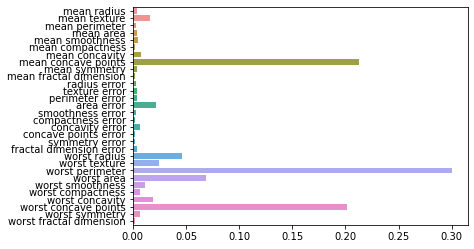

In [ ]:
# 특성 중요도 시각화: 결정트리만 지원
import seaborn as sns
import numpy as np

fi = np.mean( [ tree.feature_importances_ for tree in model_bagging.estimators_ ], axis=0 )
sns.barplot(x=fi, y=cancer.feature_names)

#### Bagging 실습 01

결정트리로 배깅을 수행 (two_moon 데이터 셋 적용)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
# BaggingClassifier 모델 학습
# n_estimators=5
from sklearn.tree import DecisionTreeClassifier

model_bagging = BaggingClassifier(DecisionTreeClassifier(splitter='best', max_depth=4),
                                  n_estimators=5, 
                                  n_jobs=2,
                                  random_state=24)
model_bagging.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
print( model_bagging.score(X_train, y_train) )
print( model_bagging.score(X_test, y_test) )
# print( model_bagging.oob_score_ )

0.9733333333333334
0.92


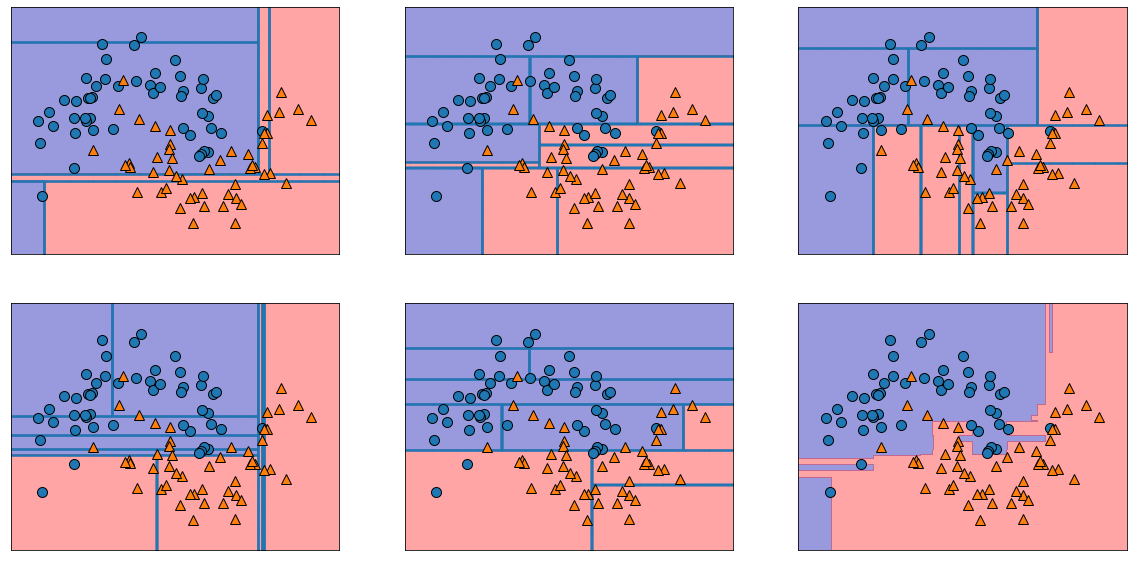

In [ ]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10) )
for tree, ax in zip(model_bagging.estimators_, axes.ravel()):
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model_bagging, X, ax=axes[-1, -1], fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- n_estimator=100으로 설정한 경우

In [ ]:
# BaggingClassifier 모델 학습
# n_estimator=100으로 설정한 경우

model_bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=4),
                                  n_estimators=100, oob_score=True,
                                  n_jobs=2,
                                  random_state=24)
model_bagging.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
print( model_bagging.score(X_train, y_train) )
print( model_bagging.score(X_test, y_test) )
print( model_bagging.oob_score_ )

0.9866666666666667
0.92
0.8666666666666667


- 배깅은 랜덤포레스트와 달리 max_samples 매개변수에서 부스트랩 샘플의 크기를 지정할 수 있음
- 랜덤포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어 있음
- 결정트리를 splitter='random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음

# Extra Tree

- 랜덤포레스트와 비슷하지만 최적의 임계값을 찾는 대신 후보 특성을 사용해 무작위로 분할한 다음 그중에서 최상의 분할을 선택
- 극단적으로 무작위한 트리의 랜덤 포레스트를 익스트림 랜덤 트리(extremely randomized tree) 또는 줄여서 엑스트라 트리(extra-tree)라고 부름

- 부스트랩 샘플링은 적용하지 않음

- 예측방식은 랜덤포래스트와 동일하게 각 트리가 만든 확률값을 평균

In [ ]:
# ExtraTreesClassifier 모델 학습
from sklearn.ensemble import ExtraTreesClassifier

model_xtc = ExtraTreesClassifier(n_estimators=5, random_state=0, n_jobs=2)
model_xtc.fit(X_train, y_train)

# 평가
print( model_xtc.score(X_train, y_train) )
print( model_xtc.score(X_test, y_test) )

1.0
0.84


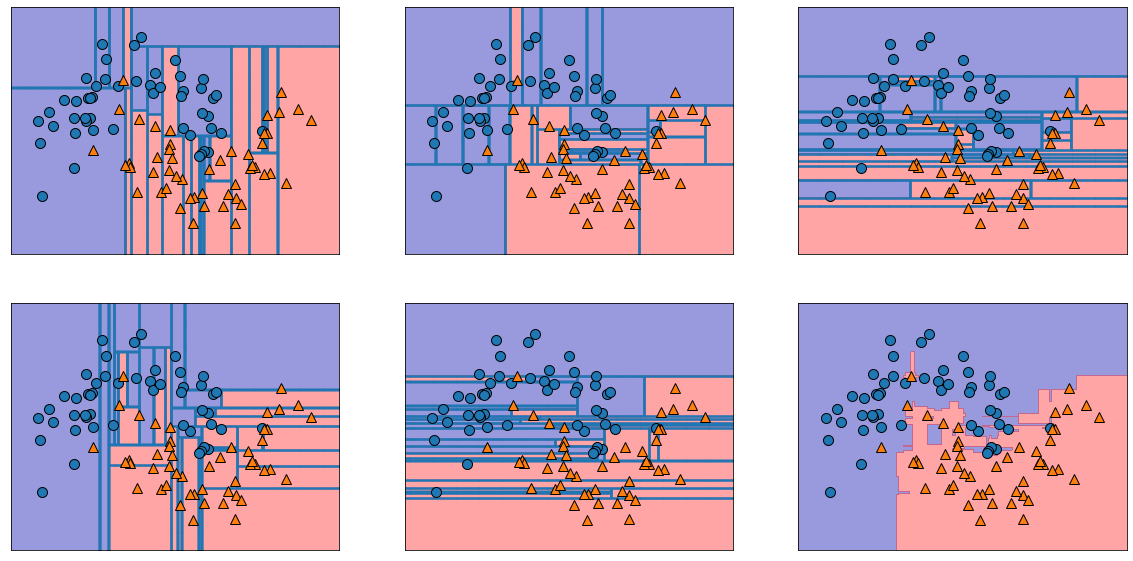

In [ ]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10) )
for tree, ax in zip(model_xtc.estimators_, axes.ravel()):
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model_xtc, X, ax=axes[-1, -1], fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#### Extra Tree 실습 01

n_estimator=100으로 설정한 경우 (유방암 데이터 세트에 적용)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [ ]:
# ExtraTreesClassifier 모델 학습
model_xtc = ExtraTreesClassifier(n_estimators=100, max_features=11, max_depth=6,
                                 random_state=0, n_jobs=2)
model_xtc.fit(X_train, y_train)

# 평가
print( model_xtc.score(X_train, y_train) )
print( model_xtc.score(X_test, y_test) )

0.9929577464788732
0.972027972027972


- 엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 냄

- 엑스트라 트리는 계산 비용이 적지만 무작위 분할 때문에 일반화 성능을 높이려면 많은 트리가 필요하다는 문제

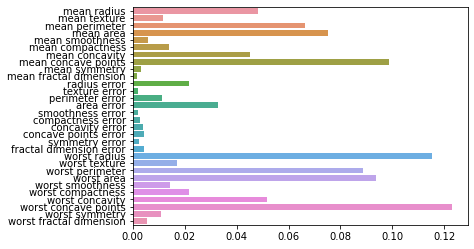

In [ ]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model_xtc.feature_importances_, y=cancer.feature_names)